# Figure 1 - RNA-seq and ATAC-seq data introduction and differential analysis results

In [ ]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

In [2]:
# source the figure theme, libraries and utility functions
source("./src/figure_theme.R")

# configs

In [3]:
# configs
data_RNA <- file.path('results','RNA')
data_ATAC <- file.path('results','ATAC','all')

results_path <- file.path('results','figures','figure_1')

# unsupervised analysis

# DEA
RNA_DEA_gene_k <- 8 # gene level
RNA_DEA_group_k <- 4  # sample/group level
ATAC_DEA_gene_k <- 9 # region level
ATAC_DEA_group_k <- 4  # sample/group level

In [4]:
# make directories if not exist
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

# Load annotations

In [5]:
# load RNA annotations
RNA_annot <- read.csv(file=file.path('metadata','RNA_sample_metadata.csv'), row.names=1)
dim(RNA_annot)
head(RNA_annot)

[1] 66 10

,library,timepoint.after.thawing,cell_line,Treatment,Treatment_time,mouse_pool,sex,organism,bio.replicate,experiment_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
RNA_PT76_R1_C_albicans_2h,Quant-seq,d010,BMDM,C_albicans,2h,PT62_c,female,mouse,R1,PT76
RNA_PT82_R1_C_albicans_24h,Quant-seq,d010,BMDM,C_albicans,24h,PT62_c,female,mouse,R1,PT82
RNA_PT76_R1_C_albicans_4h,Quant-seq,d010,BMDM,C_albicans,4h,PT62_c,female,mouse,R1,PT76
RNA_PT76_R1_C_albicans_6h,Quant-seq,d010,BMDM,C_albicans,6h,PT62_c,female,mouse,R1,PT76
RNA_PT82_R1_C_albicans_8h,Quant-seq,d010,BMDM,C_albicans,8h,PT62_c,female,mouse,R1,PT82
RNA_PT76_R1_untreated_0h,Quant-seq,d010,BMDM,untreated,0h,PT62_c,female,mouse,R1,PT76


In [6]:
RNA_annot[RNA_annot$Treatment=='untreated','Treatment_time'] <- '0h'

In [7]:
# load ATAC annotations
ATAC_annot <- read.csv(file=file.path('metadata','ATAC_sample_metadata.csv'), row.names=1)
dim(ATAC_annot)
head(ATAC_annot)

[1] 78 10

,library,timepoint.after.thawing,cell_line,Treatment,Treatment_time,mouse_pool,sex,bio.replicate,organism,experiment_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
PT76_R1_C_albicans_2h,ATAC-seq,d010,BMDM,C_albicans,2h,PT62_c,female,R1,mouse,PT76
PT76_R1_C_albicans_4h,ATAC-seq,d010,BMDM,C_albicans,4h,PT62_c,female,R1,mouse,PT76
PT76_R1_C_albicans_6h,ATAC-seq,d010,BMDM,C_albicans,6h,PT62_c,female,R1,mouse,PT76
PT76_R1_C_albicans_8h,ATAC-seq,d010,BMDM,C_albicans,8h,PT62_c,female,R1,mouse,PT76
PT76_R1_untreated_0h,ATAC-seq,d010,BMDM,untreated,0h,PT62_c,female,R1,mouse,PT76
PT76_R1_IFN_beta_2h,ATAC-seq,d010,BMDM,IFN_beta,2h,PT62_c,female,R1,mouse,PT76


In [8]:
ATAC_annot[ATAC_annot$Treatment=='untreated','Treatment_time'] <- '0h'

In [9]:
# get treatment colors
treatment_colors

untreated C albicans   IFN beta  IFN gamma  LCMV Cl13       LO28        LPS 
 "#707070"  "#0072B2"  "#D55E00"  "#E69F00"  "#CC79A7"  "#009E73"  "#56B4E9"

In [10]:
# loaded from central theme
time_shapes

0h  2h  4h  6h  8h 24h 
"⊙" "②" "④" "⑥" "⑧" "⊗"

In [11]:
# loaded from central theme
time_sizes

0h  2h  4h  6h  8h 24h 
0.5 1.0 2.0 3.0 4.0 5.0

# Unsupervised Analysis

In [12]:
# load RNA data
RNA_UMAP = read.csv(file=file.path(data_RNA,'unsupervised_analysis','UMAP_normCQN.csv'), row.names=1)
colnames(RNA_UMAP) <- c('UMAP_1', 'UMAP_2')
RNA_UMAP$treatment <- RNA_annot[rownames(RNA_UMAP),'Treatment']
RNA_UMAP$treatment <- str_replace(RNA_UMAP$treatment, '_', ' ')
RNA_UMAP$time <- RNA_annot[rownames(RNA_UMAP),'Treatment_time']
RNA_UMAP$time2 <- substr(RNA_UMAP$time,1,nchar(RNA_UMAP$time)-1)
dim(RNA_UMAP)
head(RNA_UMAP)

[1] 64  5

,UMAP_1,UMAP_2,treatment,time,time2
,<dbl>,<dbl>,<chr>,<chr>,<chr>
RNA_PT82_R1_LO28_24h,16.85795,5.788584,LO28,24h,24
RNA_PT82_R2_LO28_24h,16.61405,5.979271,LO28,24h,24
RNA_PT76_R2_LCMV_Cl13_4h,18.18666,8.839304,LCMV Cl13,4h,4
RNA_PT76_R1_LO28_6h,16.60681,4.533501,LO28,6h,6
RNA_PT82_R2_untreated_24h,16.27261,9.502245,untreated,0h,0
RNA_PT82_R2_IFN_beta_24h,12.52122,10.373726,IFN beta,24h,24


In [13]:
# load ATAC data
ATAC_UMAP = read.csv(file=file.path(data_ATAC,'unsupervised_analysis','UMAP_all_normCQN.csv'), row.names=1)
colnames(ATAC_UMAP) <- c('UMAP_1', 'UMAP_2')
ATAC_UMAP$treatment <- ATAC_annot[rownames(ATAC_UMAP),'Treatment']
ATAC_UMAP$treatment <- str_replace(ATAC_UMAP$treatment, '_', ' ')
ATAC_UMAP$time <- ATAC_annot[rownames(ATAC_UMAP),'Treatment_time']
ATAC_UMAP$time2 <- substr(ATAC_UMAP$time,1,nchar(ATAC_UMAP$time)-1)
dim(ATAC_UMAP)
head(ATAC_UMAP)

[1] 78  5

,UMAP_1,UMAP_2,treatment,time,time2
,<dbl>,<dbl>,<chr>,<chr>,<chr>
PT76_R1_C_albicans_2h,11.952186,5.4514690,C albicans,2h,2
PT76_R1_C_albicans_4h,12.252378,5.9944170,C albicans,4h,4
PT76_R1_C_albicans_6h,12.402553,5.7770624,C albicans,6h,6
PT76_R1_C_albicans_8h,12.028141,6.3553834,C albicans,8h,8
PT76_R1_untreated_0h,10.870095,6.1543300,untreated,0h,0
PT76_R1_IFN_beta_2h,-7.282421,0.5316364,IFN beta,2h,2


In [14]:
width <- 5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

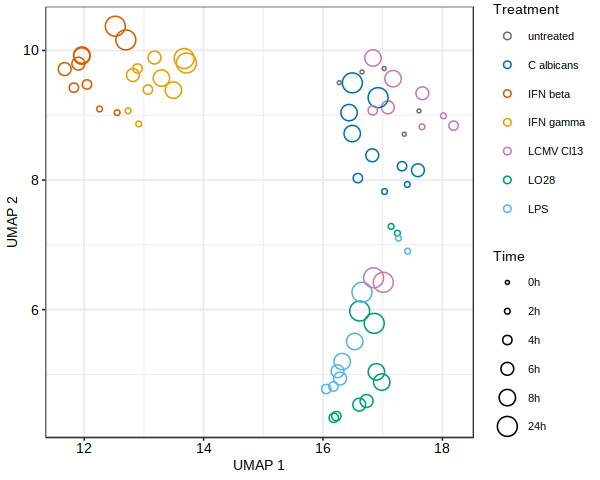

In [15]:
# plot RNA data
RNA_UMAP_p <- ggplot(RNA_UMAP, aes(x=UMAP_1, y=UMAP_2, group=treatment)) +
geom_point(aes(size=time, color=treatment), shape=21, stroke = 0.5) + # for time encoded by size
scale_size_manual(values=time_sizes) +
scale_color_manual(values=treatment_colors, drop=FALSE) +
    xlab("UMAP 1") +    
    ylab("UMAP 2") +
guides(color=guide_legend(title="Treatment", order=1), size=guide_legend(title="Time", order=2)) +
    macro_theme()

RNA_UMAP_p

In [16]:
# save plot
ggsave_new(filename="unsupervised_analysis_rna",
           results_path=results_path,
           plot=RNA_UMAP_p,
           width=width,
           height=height
          )

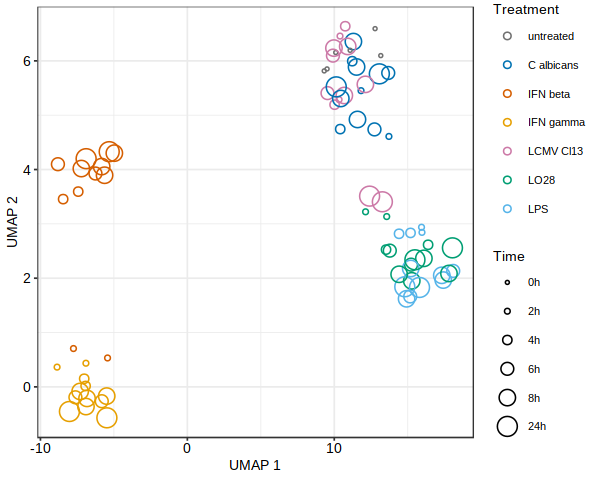

In [17]:
# plot ATAC data
options(repr.plot.width=width, repr.plot.height=height)
set.seed(42)
ATAC_UMAP_p <- ggplot(ATAC_UMAP, aes(x=UMAP_1, y=UMAP_2, group=treatment)) +
geom_jitter(aes(size=time, color=treatment), shape=21, stroke = 0.5, width = 2, height = 0) + # for time encoded by size
scale_size_manual(values=time_sizes) +
scale_color_manual(values=treatment_colors, drop=FALSE) +
    # geom_text_repel(aes(label=time2, color=treatment), size=4, max.overlaps = Inf)+
    xlab("UMAP 1") +    
    ylab("UMAP 2") +
guides(color=guide_legend(title="Treatment", order=1), size=guide_legend(title="Time", order=2)) +
    macro_theme()

ATAC_UMAP_p

In [18]:
# save plot
ggsave_new(filename="unsupervised_analysis_atac",
           results_path=results_path,
           plot=ATAC_UMAP_p,
           width=width,
           height=height
          )

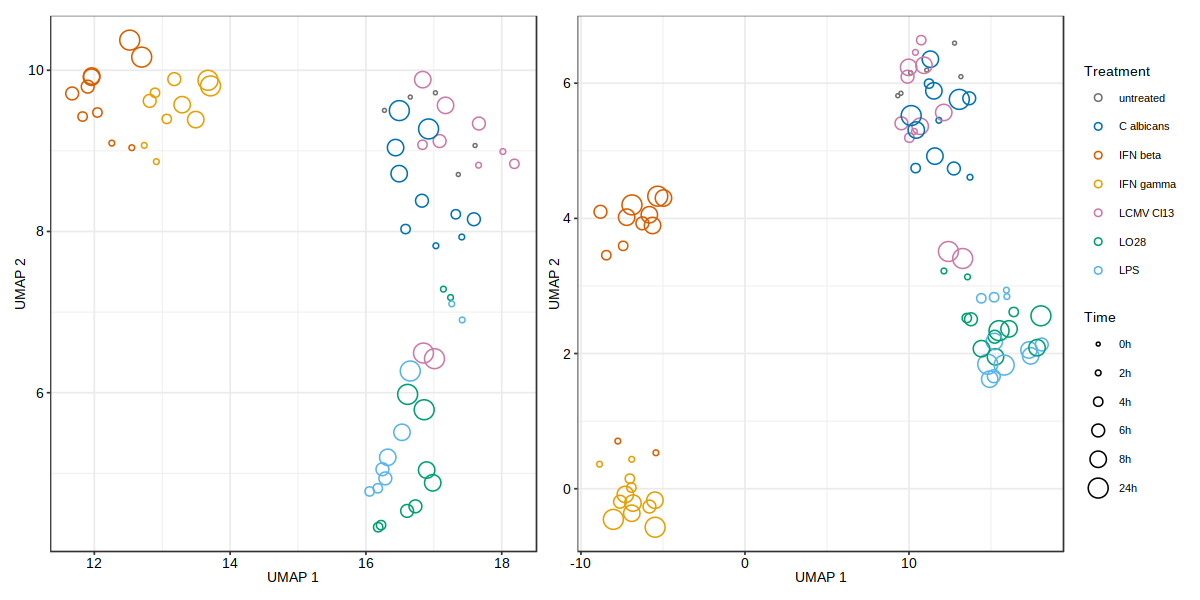

In [19]:
width=10
height=5

options(repr.plot.width=width, repr.plot.height=height)
set.seed(42)

panel_unsupervised_analysis <- RNA_UMAP_p + theme(legend.position = "none") | ATAC_UMAP_p
panel_unsupervised_analysis

# save plot
ggsave_new(filename="unsupervised_analysis_all",
           results_path=results_path,
           plot=panel_unsupervised_analysis,
           width=width,
           height=height
          )

# Differential Analysis - Gene/region clusters across treatments & time

In [20]:
# load RNA data
RNA_DEAclusters <- read.delim(file=file.path(data_RNA,'DEA','DEA_LFC_gene_matrix.csv'), sep=',', header = TRUE)
dim(RNA_DEAclusters)
head(RNA_DEAclusters)

[1] 4776   30

,C_albicans_24h,C_albicans_2h,C_albicans_4h,C_albicans_6h,C_albicans_8h,IFN_beta_24h,IFN_beta_2h,IFN_beta_4h,IFN_beta_6h,IFN_beta_8h,⋯,LO28_24h,LO28_2h,LO28_4h,LO28_6h,LO28_8h,LPS_24h,LPS_2h,LPS_4h,LPS_6h,LPS_8h
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000028,-0.20673552,-0.2153327,-0.4282111,-0.88354272,-0.247492238,-2.9821377,-0.5362587,-1.182338,-1.8276779,-1.8364330,⋯,-4.4611689,-0.08138483,-1.874504,-2.141904,-2.9955533,-4.73748313,-0.2974107,-1.324901,-3.6953524,-3.4721694
ENSMUSG00000000056,0.33946228,-0.5701438,0.9423290,0.45727404,-0.004060171,1.3044050,-1.3056150,-2.769547,-0.5929152,0.3760752,⋯,-0.7376993,-1.66021515,-2.648116,-1.624403,-0.8354671,0.73877575,-1.5066707,-2.076023,-0.7140545,0.2729229
ENSMUSG00000000058,0.09947234,-0.3690868,-0.9341449,-0.74870627,-0.294654354,0.2712119,-0.6019990,-1.609499,-2.1615721,-2.6187514,⋯,-0.5382770,-0.34133991,-1.205038,-1.941283,-1.7809636,0.01306102,-0.3540936,-1.307588,-2.1172413,-2.2052372
ENSMUSG00000000085,-0.23482941,-0.2351960,-0.5148343,-0.66244211,-0.553454474,-2.1606764,-0.6473294,-1.435706,-1.6568474,-1.4744426,⋯,-2.0373081,-0.63150555,-1.304555,-2.059484,-1.4817568,-1.08755844,-0.3795498,-1.171191,-1.9240025,-2.1027764
ENSMUSG00000000148,-0.33472685,-0.2484283,0.3414455,-0.07098431,-0.492375598,-0.4861203,-0.8312585,-1.999490,-2.2578213,-1.2583179,⋯,-1.0011180,-1.01529821,-1.893661,-2.460071,-0.8325835,-0.02838997,-1.7898350,-1.458051,-0.5342777,-0.3761306
ENSMUSG00000000149,-0.48288817,-0.3439719,-0.3717490,-0.51983361,-0.753141558,-0.9298673,-0.2600450,-1.739769,-2.4815435,-2.3764220,⋯,-2.0216855,-0.39360436,-2.389940,-3.345734,-3.8156141,-1.53077674,-0.4391117,-1.839445,-2.9995242,-2.0322522


In [21]:
time_colors

0h        2h        4h        6h        8h       24h 
"#FFF7BC" "#FFF7BC" "#FEE391" "#FEC44F" "#FB9A29" "#EC7014"

In [22]:
# heatmap configs
annotation_col <- data.frame(row.names=(colnames(RNA_DEAclusters)))
annotation_col$Time <- paste0(lapply(rownames(annotation_col), function(x) tail(str_split(x, '_')[[1]], n=1)[1]))
annotation_col$time2 <- sapply(substr(annotation_col$Time,1,nchar(annotation_col$Time)-1), as.numeric)
annotation_col$Treatment <- str_replace(str_remove(rownames(annotation_col), paste0('_',annotation_col$Time)), '_', ' ')

head(annotation_col)

ann_colors = list(
    Treatment = treatment_colors[names(treatment_colors)!='untreated' & names(treatment_colors)!='up' & names(treatment_colors)!='down'],
    Time = time_colors[names(time_colors)!='0h']
)

,Time,time2,Treatment
,<chr>,<dbl>,<chr>
C_albicans_24h,24h,24,C albicans
C_albicans_2h,2h,2,C albicans
C_albicans_4h,4h,4,C albicans
C_albicans_6h,6h,6,C albicans
C_albicans_8h,8h,8,C albicans
IFN_beta_24h,24h,24,IFN beta


In [23]:
width=7
height=5
options(repr.plot.width=width, repr.plot.height=height)

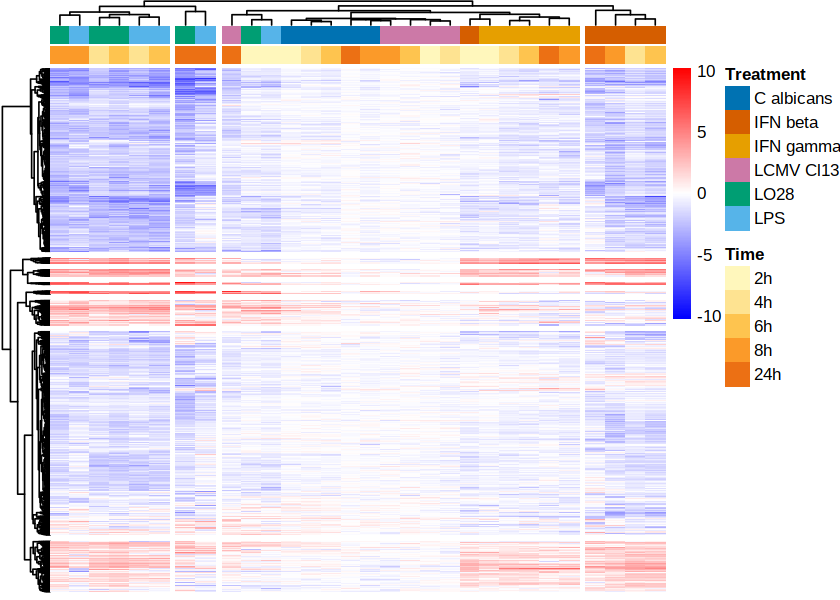

In [24]:
# make heatmap
DEG_clustermap <- as.ggplot(pheatmap(RNA_DEAclusters, 
               show_rownames=F, 
               show_colnames=F, 
               cutree_rows = RNA_DEA_gene_k,
               cutree_cols = RNA_DEA_group_k,
               treeheight_row = 25,
               treeheight_col = 10,
               annotation_col = annotation_col[,c('Time','Treatment')],
               annotation_colors = ann_colors,
               breaks=seq(-max(abs(RNA_DEAclusters)), max(abs(RNA_DEAclusters)), length.out=200),
               color=colorRampPalette(c("blue", "white", "red"))(200),
                                     annotation_names_col = F
              ))

In [25]:
# save plot
ggsave_new(filename="DEA_RNA",
           results_path=results_path,
           plot=DEG_clustermap,
           width=width,
           height=height
          )

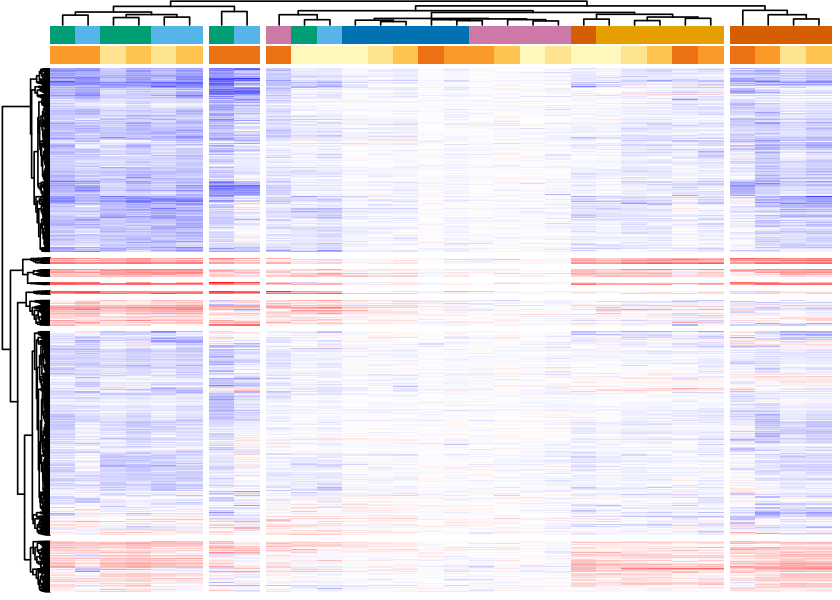

In [26]:
# save for panel without legend
DEG_clustermap_p <- as.ggplot(pheatmap(RNA_DEAclusters, 
               show_rownames=F, 
               show_colnames=F, 
               cutree_rows = RNA_DEA_gene_k,
               cutree_cols = RNA_DEA_group_k,
               treeheight_row = 25,
               treeheight_col = 10,
               annotation_col = annotation_col[,c('Time', 'Treatment')],
               annotation_colors = ann_colors,
               breaks=seq(-max(abs(RNA_DEAclusters)), max(abs(RNA_DEAclusters)), length.out=200),
               color=colorRampPalette(c("blue", "white", "red"))(200),
               legend=F,
               annotation_legend = F,
               annotation_names_col = F
              ))

In [27]:
# load ATAC data
ATAC_DEAclusters = read.delim(file=file.path(data_ATAC,'DEA','DEA_LFC_region_matrix.csv'), sep=',', header = TRUE)
dim(ATAC_DEAclusters)
head(ATAC_DEAclusters)

[1] 19042    30

,C_albicans_24h,C_albicans_2h,C_albicans_4h,C_albicans_6h,C_albicans_8h,IFN_beta_24h,IFN_beta_2h,IFN_beta_4h,IFN_beta_6h,IFN_beta_8h,⋯,LO28_24h,LO28_2h,LO28_4h,LO28_6h,LO28_8h,LPS_24h,LPS_2h,LPS_4h,LPS_6h,LPS_8h
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CONS00000032052,0.23995992,1.316109,0.7570536,0.6546095,0.51398860,1.5384207,2.1046638,1.5170251,1.262151,1.257797,⋯,1.6241451,2.1800248,2.6506576,2.1675324,2.146144,2.00677657,2.4039642,2.0652931,1.7926574,1.6944651
CONS00000173048,0.06523020,1.136280,0.9331835,0.8261297,0.54738496,-2.1590042,-1.7651474,-1.4747522,-1.680336,-1.240507,⋯,-0.3322400,0.9335955,-0.5832041,-0.9713838,-0.332181,0.05991344,-0.1898207,-0.5409518,-0.6042437,-0.2616813
CONS00000035425,0.56325897,1.675992,0.6039297,0.8369010,0.39073418,0.9404634,1.1212579,1.4475303,1.921941,1.904647,⋯,1.8033124,2.4261728,1.9510910,2.0504815,2.135650,1.94413867,2.3219851,1.9461018,1.8176544,1.9170462
CONS00000094590,0.46865368,1.885904,1.1946675,1.7617854,1.38314319,1.4708674,0.1684766,0.8933264,1.710469,1.680450,⋯,2.9028311,2.7423724,3.0531959,3.0077834,3.150302,3.27160441,2.6256134,2.4014307,2.7793057,2.9218425
CONS00000084911,0.48869549,1.322371,0.1924530,0.4971589,0.09488415,1.0293465,1.9316631,1.5889523,1.456971,1.382775,⋯,0.6244121,1.6058656,1.8567645,1.4192549,1.303439,0.60102384,1.3927831,1.1082305,1.1404814,0.8690589
CONS00000023238,0.08389637,1.625600,0.4917933,0.7808769,0.60421330,1.6885279,2.8500294,3.0492213,3.145277,3.253942,⋯,2.9863706,2.2771348,2.9908819,3.0644125,3.102173,1.83256259,2.5124141,2.6851037,2.6542798,2.7645901


In [28]:
# heatmap configs
annotation_col <- data.frame(row.names=(colnames(ATAC_DEAclusters)))
annotation_col$Time <- paste0(lapply(rownames(annotation_col), function(x) tail(str_split(x, '_')[[1]], n=1)[1]))
annotation_col$time2 <- sapply(substr(annotation_col$Time,1,nchar(annotation_col$Time)-1), as.numeric)
annotation_col$Treatment <- str_replace(str_remove(rownames(annotation_col), paste0('_',annotation_col$Time)), '_', ' ')

head(annotation_col)

ann_colors = list(
    Treatment = treatment_colors[names(treatment_colors)!='untreated' & names(treatment_colors)!='up' & names(treatment_colors)!='down'],
    Time = time_colors[names(time_colors)!='0h']
)

,Time,time2,Treatment
,<chr>,<dbl>,<chr>
C_albicans_24h,24h,24,C albicans
C_albicans_2h,2h,2,C albicans
C_albicans_4h,4h,4,C albicans
C_albicans_6h,6h,6,C albicans
C_albicans_8h,8h,8,C albicans
IFN_beta_24h,24h,24,IFN beta


In [29]:
width=7
height=5
options(repr.plot.width=width, repr.plot.height=height)

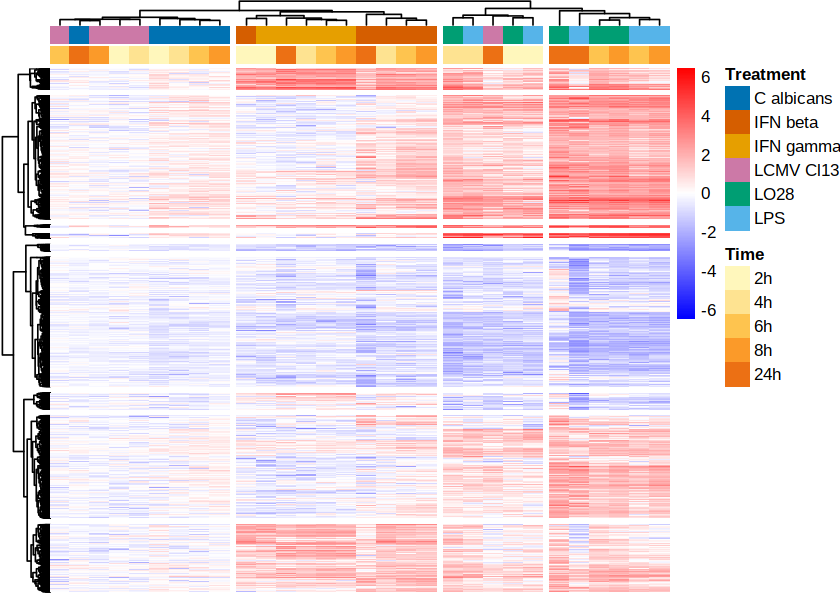

In [30]:
# make heatmap
DAR_clustermap <- as.ggplot(pheatmap(ATAC_DEAclusters, 
               show_rownames=F,
               show_colnames=F,
               cutree_rows = ATAC_DEA_gene_k,
               cutree_cols = ATAC_DEA_group_k,
               treeheight_row = 25,
               treeheight_col = 10,
               annotation_col = annotation_col[,c('Time', 'Treatment')],
               annotation_colors = ann_colors,
               breaks=seq(-max(abs(ATAC_DEAclusters)), max(abs(ATAC_DEAclusters)), length.out=200),
               color=colorRampPalette(c("blue", "white", "red"))(200),
                                     annotation_names_col = F
              ))

In [31]:
# save plot
ggsave_new(filename="DEA_ATAC",
           results_path=results_path,
           plot=DAR_clustermap,
           width=width,
           height=height
          )

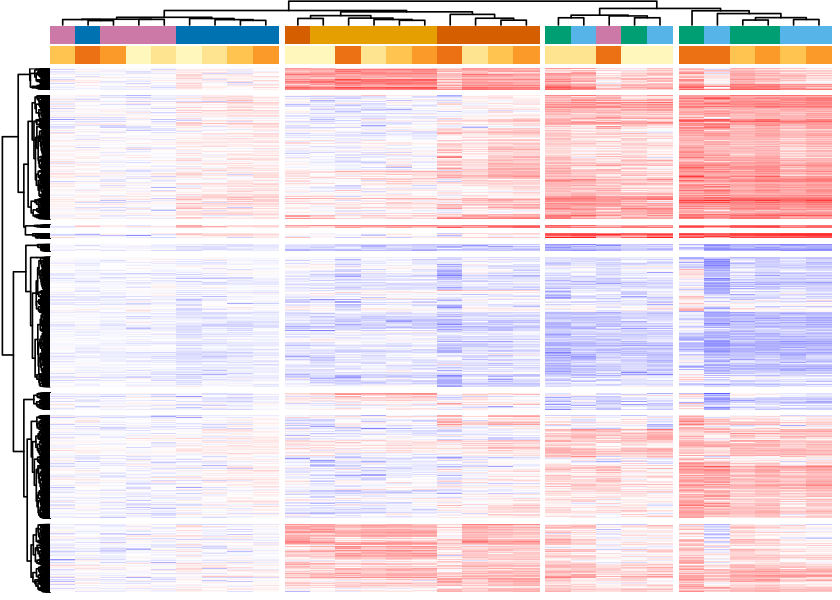

In [32]:
# save for panel without legend
DAR_clustermap_p <- as.ggplot(pheatmap(ATAC_DEAclusters, 
               show_rownames=F,
               show_colnames=F,
               cutree_rows = ATAC_DEA_gene_k,
               cutree_cols = ATAC_DEA_group_k,
               treeheight_row = 25,
               treeheight_col = 10,
               annotation_col = annotation_col[,c('Time', 'Treatment')],
               annotation_colors = ann_colors,
               breaks=seq(-max(abs(ATAC_DEAclusters)), max(abs(ATAC_DEAclusters)), length.out=200),
               color=colorRampPalette(c("blue", "white", "red"))(200),
               legend=F,
               annotation_legend = F,
               annotation_names_col = F
              ))

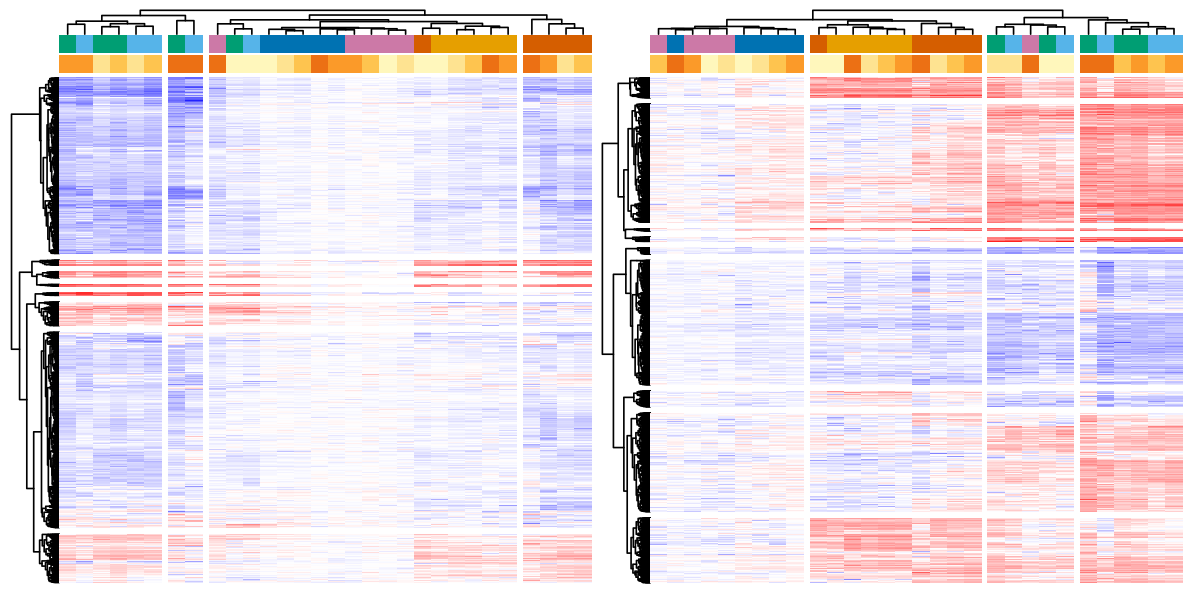

In [33]:
width=10
height=5

options(repr.plot.width=width, repr.plot.height=height)

panel_DEA <- (DEG_clustermap_p | DAR_clustermap_p) #+ plot_layout(widths = c(2, 3, 3))
panel_DEA

In [34]:
# save plot
ggsave_new(filename="DEA_all",
           results_path=results_path,
           plot=panel_DEA,
           width=width,
           height=height
          )

In [35]:
# width = 10
# height = 10
# options(repr.plot.width=width, repr.plot.height=height)

# fig1 <- (RNA_UMAP_p + theme(legend.position = "none")| DEG_clustermap_p) / (ATAC_UMAP_p+ theme(legend.position = "none") | DAR_clustermap_p)
# fig1

# width = 10
# height = 8
# options(repr.plot.width=width, repr.plot.height=height)
# set.seed(42)

# fig1 <- (panel_unsupervised_analysis) / (panel_DEA)
# fig1

# # save plot
# ggsave_new(filename="0_Figure1",
#            results_path=results_path,
#            plot=fig1,
#            width=width,
#            height=height
#           )